<a href="https://colab.research.google.com/github/Deep-Dey1/Deep-Learning-Programs/blob/main/DL_lab_8_and_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement RNN for sentiment analysis on movie reviews**

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5061 - loss: 0.6948 - val_accuracy: 0.5050 - val_loss: 0.6938
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5935 - loss: 0.6570 - val_accuracy: 0.5484 - val_loss: 0.6929
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6969 - loss: 0.5086 - val_accuracy: 0.4938 - val_loss: 0.7525
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7434 - loss: 0.4471 - val_accuracy: 0.5125 - val_loss: 0.8987
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7549 - loss: 0.3755 - val_accuracy: 0.5624 - val_loss: 0.9761
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5641 - loss: 0.9671
Test Accuracy: 0.5624


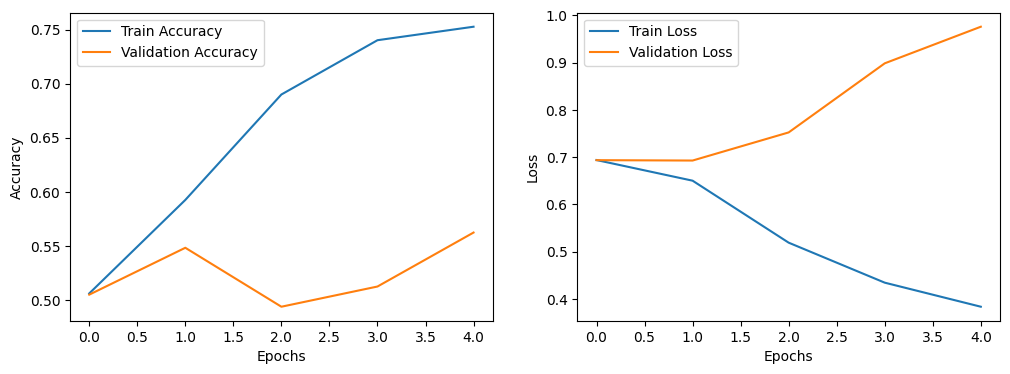

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
vocab_size = 10000  # Number of words to consider as features
max_length = 200  # Maximum length of a review

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
train_data = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

# Step 2: Build RNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train Model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

# Step 4: Evaluate Model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {accuracy:.4f}')

# Step 5: Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Implement Bidirectional LSTM for sentiment analysis on movie reviews**

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6850 - loss: 0.5776 - val_accuracy: 0.8467 - val_loss: 0.3703
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8831 - loss: 0.2970 - val_accuracy: 0.8448 - val_loss: 0.3851
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9054 - loss: 0.2452 - val_accuracy: 0.8313 - val_loss: 0.3926
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9378 - loss: 0.1724 - val_accuracy: 0.8431 - val_loss: 0.4164
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9556 - loss: 0.1288 - val_accuracy: 0.8412 - val_loss: 0.4932
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8427 - loss: 0.4927
Test Accuracy: 0.8412


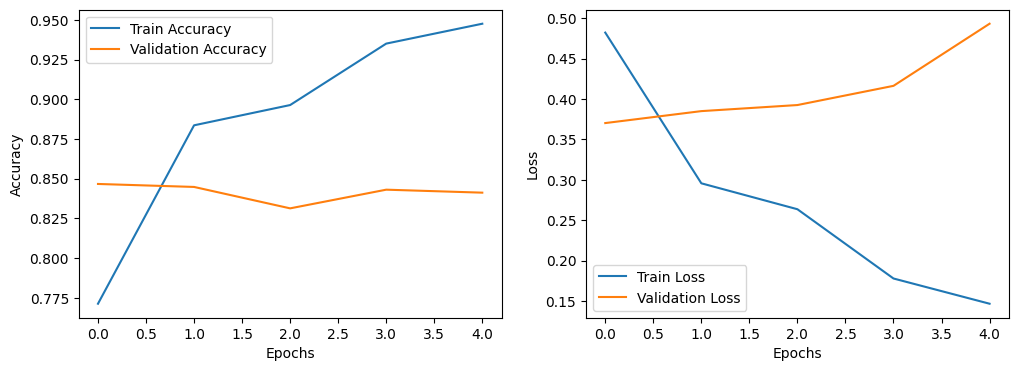

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
vocab_size = 10000  # Number of words to consider as features
max_length = 200  # Maximum length of a review

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
train_data = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

# Step 2: Build Bidirectional LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train Model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

# Step 4: Evaluate Model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {accuracy:.4f}')

# Step 5: Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
